# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [13]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [14]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [15]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


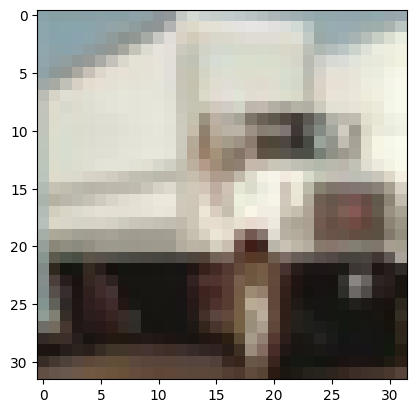

In [16]:
print(y_train[444])
plt.imshow(x_train[444]);

In [17]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [18]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Convert to float and scale the datasets

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [20]:

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       147,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181,162 (707.66 KB)

 Trainable params: 181,162 (707.66 KB)

 Non-trainable params: 0 (0.00 B)

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [21]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2776 - loss: 1.9480 - val_accuracy: 0.4725 - val_loss: 1.4581
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4504 - loss: 1.5155 - val_accuracy: 0.5175 - val_loss: 1.3332
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5053 - loss: 1.3816 - val_accuracy: 0.5452 - val_loss: 1.2843
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5358 - loss: 1.2977 - val_accuracy: 0.5649 - val_loss: 1.2334
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5587 - loss: 1.2466 - val_accuracy: 0.5810 - val_loss: 1.2336
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5701 - loss: 1.2071 - val_accuracy: 0.6096 - val_loss: 1.1077
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5830 - loss: 1.1767 - val_accuracy: 0.6254 - val_loss: 1.0749
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5945 - loss: 1.1482 

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [33]:

supp_model = Sequential()


# Convolution 1
supp_model.add(Conv2D(32, (5, 5), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
# Convolution 2
supp_model.add(Conv2D(32, (5, 5), strides = (1,1), padding='same'))
## 2x2 max pooling reduces to 3 x 3 x 32
supp_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution 1
supp_model.add(Conv2D(32, (5, 5), strides = (1,1), padding='same'))
# Convolution 2
supp_model.add(Conv2D(32, (5, 5), strides = (1,1), padding='same'))

## 2x2 max pooling reduces to 3 x 3 x 32
supp_model.add(MaxPooling2D(pool_size=(2, 2)))

supp_model.add(Flatten())
supp_model.add(Dense(num_classes))
supp_model.add(Activation('softmax'))


supp_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │        20,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,818 (389.91 KB)

 Trainable params: 99,818 (389.91 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


supp_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

supp_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4030 - loss: 1.6870 - val_accuracy: 0.5547 - val_loss: 1.2719
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6004 - loss: 1.1599 - val_accuracy: 0.5890 - val_loss: 1.1826
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6518 - loss: 1.0256 - val_accuracy: 0.6434 - val_loss: 1.0413
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6757 - loss: 0.9464 - val_accuracy: 0.6391 - val_loss: 1.0514
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6971 - loss: 0.8902 - val_accuracy: 0.6508 - val_loss: 1.0300


> Compared to the earlier model, this model is faster because it only did 5 epochs. However, its performance is similar to the earlier model. The only difference is this model overfit a bit.

## Using 10x10 kernel

In [31]:

model_2 = Sequential()


# Convolution 1
model_2.add(Conv2D(32, (10, 10), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
# Convolution 2
model_2.add(Conv2D(32, (10, 10), strides = (1,1), padding='same'))
## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))

# Convolution 1
model_2.add(Conv2D(32, (10, 10), strides = (1,1), padding='same'))
# Convolution 2
model_2.add(Conv2D(32, (10, 10), strides = (1,1), padding='same'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))


model_2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │         9,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │       102,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 32)     │       102,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 32)     │       102,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        20,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,418 (1.29 MB)

 Trainable params: 337,418 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3197 - loss: 2.0782 - val_accuracy: 0.4711 - val_loss: 1.5824
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5377 - loss: 1.3313 - val_accuracy: 0.5016 - val_loss: 1.3955
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5918 - loss: 1.1883 - val_accuracy: 0.5733 - val_loss: 1.2396
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6278 - loss: 1.0821 - val_accuracy: 0.5490 - val_loss: 1.3897
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6602 - loss: 0.9853 - val_accuracy: 0.4723 - val_loss: 1.7573
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6749 - loss: 0.9405 - val_accuracy: 0.5833 - val_loss: 1.3300
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7152 - loss: 0.8278 - val_accuracy: 0.5797 - val_loss: 1.3418
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7360 - loss: 

## Using multiple 3x3 kernel size

In [38]:
from keras.layers import BatchNormalization

model_3 = Sequential()


# Input Convolution 1
model_3.add(Conv2D(32, (3, 3), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())

# Convolution 2
model_3.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())

model_3.add(MaxPooling2D((2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_3.add(MaxPooling2D(pool_size=(2, 2)))


model_3.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())

model_3.add(MaxPooling2D((2,2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_3.add(Activation('relu'))
model_3.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_3.add(MaxPooling2D((2,2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(256,))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
# Output
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))


model_3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_30 (Activation)      │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 64)       │             

 Total params: 227,818 (889.91 KB)

 Trainable params: 227,050 (886.91 KB)

 Non-trainable params: 768 (3.00 KB)

In [42]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.9140 - loss: 0.2549 - val_accuracy: 0.8386 - val_loss: 0.6178
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9209 - loss: 0.2391 - val_accuracy: 0.8431 - val_loss: 0.6236
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9205 - loss: 0.2391 - val_accuracy: 0.8193 - val_loss: 0.7072
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9202 - loss: 0.2428 - val_accuracy: 0.8377 - val_loss: 0.5926
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9202 - loss: 0.2381 - val_accuracy: 0.8372 - val_loss: 0.6423
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9206 - loss: 0.2377 - val_accuracy: 0.8405 - val_loss: 0.6330
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9252 - loss: 0.2268 - val_accuracy: 0.8266 - val_loss: 0.6874
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9217 - loss: 0.2

KeyboardInterrupt: 

## Using multiple 5v5

In [51]:
from keras.layers import BatchNormalization

model_4 = Sequential()


# Input Convolution 1
model_4.add(Conv2D(32, (3, 3), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())

# 32
model_4.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_4.add(MaxPooling2D(pool_size=(2, 2)))

# 64
model_4.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_4.add(MaxPooling2D((2,2)))
model_4.add(Dropout(0.25))

# 128
model_4.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_4.add(MaxPooling2D((2,2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())
model_4.add(Dense(256,))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
# Output
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))


model_4.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_88 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_73 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_74 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_90 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_75 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_91 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_76 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_77 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_52          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_78 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_53          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_79 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 16, 16, 64)     │           25

 Total params: 1,205,226 (4.60 MB)

 Trainable params: 1,203,434 (4.59 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [52]:
batch_size = 32

opt = keras.optimizers.RMSprop(learning_rate=0.0005)


model_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - accuracy: 0.3022 - loss: 2.0550 - val_accuracy: 0.5139 - val_loss: 1.4972
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5621 - loss: 1.2823 - val_accuracy: 0.6465 - val_loss: 1.0480
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6455 - loss: 1.0643 - val_accuracy: 0.6694 - val_loss: 1.0392
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6940 - loss: 0.9354 - val_accuracy: 0.6886 - val_loss: 0.9621
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7189 - loss: 0.8627 - val_accuracy: 0.7448 - val_loss: 0.8195
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7467 - loss: 0.7835 - val_accuracy: 0.7630 - val_loss: 0.7457
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7687 - loss: 0.7268 - val_accuracy: 0.7703 - val_loss: 0.7100
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7880 -

## Using a wider model

In [53]:
from keras.layers import BatchNormalization

model_5 = Sequential()


# Input Convolution 1
model_5.add(Conv2D(64, (3, 3), strides = (1,1), padding='same',
                 input_shape=x_train.shape[1:]))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())

# 32
model_5.add(Conv2D(64, (3, 3), strides = (1,1), padding='same'))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_5.add(MaxPooling2D((2,2)))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())
model_5.add(Conv2D(128, (3, 3), strides = (1,1), padding='same'))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_5.add(MaxPooling2D((2,2)))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(256, (3, 3), strides = (1,1), padding='same'))
model_5.add(Activation('relu'))
model_5.add(BatchNormalization())

## 2x2 max pooling reduces to 3 x 3 x 32
model_5.add(MaxPooling2D((2,2)))
model_5.add(Dropout(0.25))

model_5.add(Flatten())
model_5.add(Dense(256,))
model_5.add(Activation('relu'))
model_5.add(Dropout(0.5))
# Output
model_5.add(Dense(num_classes))
model_5.add(Activation('softmax'))


model_5.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)             │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_87 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_88 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_89 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_90 (Activation)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_91 (Activation)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_64          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,609,290 (6.14 MB)

 Trainable params: 1,608,010 (6.13 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [56]:
batch_size = 32

opt = keras.optimizers.Adam(learning_rate=0.0005)


model_5.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9247 - loss: 0.2230 - val_accuracy: 0.8476 - val_loss: 0.5925
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9290 - loss: 0.2133 - val_accuracy: 0.8653 - val_loss: 0.5101
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9284 - loss: 0.2107 - val_accuracy: 0.8556 - val_loss: 0.5258
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9294 - loss: 0.2108 - val_accuracy: 0.8685 - val_loss: 0.5083
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9317 - loss: 0.2008 - val_accuracy: 0.8619 - val_loss: 0.5320
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9354 - loss: 0.1905 - val_accuracy: 0.8673 - val_loss: 0.4815
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9354 - loss: 0.1957 - val_accuracy: 0.8663 - val_loss: 0.5083
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9378 - loss

# Conclusion

In this lab activity, I was shown how to create a CNN model for image recognition. The procedures introduced me how to create a CNN model for the CIFAR 10. In the supplementary activity, I folowed the instuctions to create the specified model format. It returns a similar performance from the procedures but it is faster. For optimizing the model, firstly I tried to do 3x3 kernel size and increased cnn layers. Then I did 5x5 kernel size. Both tries were bad. Then I tried to create a deeper model but it plateaus at 84% after 80+ epochs. So I tried to create a wider model. It is better and converges quicker to the optima. Overall, this activity helped me to learn how to use CNN by eperimenting ways to optimize it.